In [1]:
import google.generativeai as genai, json
from matplotlib import pyplot as plt
import time, pandas as pd
from utils import load_env_vars

load_env_vars()

base_models = [m.name for m in genai.list_models() if "createTunedModel" in m.supported_generation_methods]
base_models

['models/gemini-1.0-pro-001', 'models/gemini-1.5-flash-001-tuning']

In [3]:
for base_model, short_model in [("models/gemini-1.5-flash-001-tuning", "1p5-flash")]: # , ("models/gemini-1.0-pro-001", "1p0-pro")
    for dataset_types in ["R"]: # "PR", "R"
        model_name = f"lamp-gem-{short_model}-{dataset_types.lower()}"
        print(model_name)

        with open(f"data/finetune_{dataset_types}_train.json", "r") as f:
            training_data = json.load(f)

    operation = genai.create_tuned_model(source_model=base_model, training_data=training_data, id=model_name, epoch_count=4, batch_size=4, learning_rate=0.001)

lamp-gem-1p5-flash-r


  0%|          | 0/1786 [00:00<?, ?it/s]

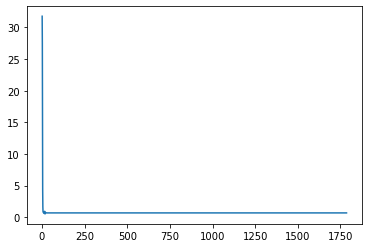

In [3]:
for status in operation.wait_bar():
    time.sleep(30)

model = operation.result()
snapshots = pd.DataFrame(model.tuning_task.snapshots)

plt.plot(snapshots['step'].tolist(), snapshots['mean_loss'].tolist())
plt.show()